In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load and Prepare Market Data

In [5]:
market = pd.read_csv("data/market.csv", parse_dates=["date"])
market.set_index("date", inplace=True)
market.sort_index(inplace=True)

# Compute daily returns
returns = market.pct_change().dropna()
returns.rename(columns={"SP500": "SP500_return", "BONDS": "10Y_return"}, inplace=True)

Initialize Simulation Variables

In [6]:
initial_balance = 1_000_000
balance = initial_balance
withdrawal_rate = 0.05
tax_rate = 0.15

withdrawals = []
history = []

Run Simulation Loop

In [15]:
for day_index, (date, row) in enumerate(returns.iterrows()):
    sp500_return = row["SP500_return"]
    ten_year_return = row["10Y_return"]

    weights = {"SP500": 0.8, "10Y": 0.2}
    portfolio_return = sp500_return * weights["SP500"] + ten_year_return * weights["10Y"]
    gain = balance * portfolio_return
    balance += gain

    if day_index % 365 == 0 and withdrawal_rate > 0:
        withdrawal = withdrawal_rate * balance
        tax = tax_rate * withdrawal
        balance -= (withdrawal + tax)
    else:
        withdrawal = 0

    withdrawals.append(withdrawal)
    history.append(balance)

    if balance <= 0:
        balance = 0
        break

Visualize Results

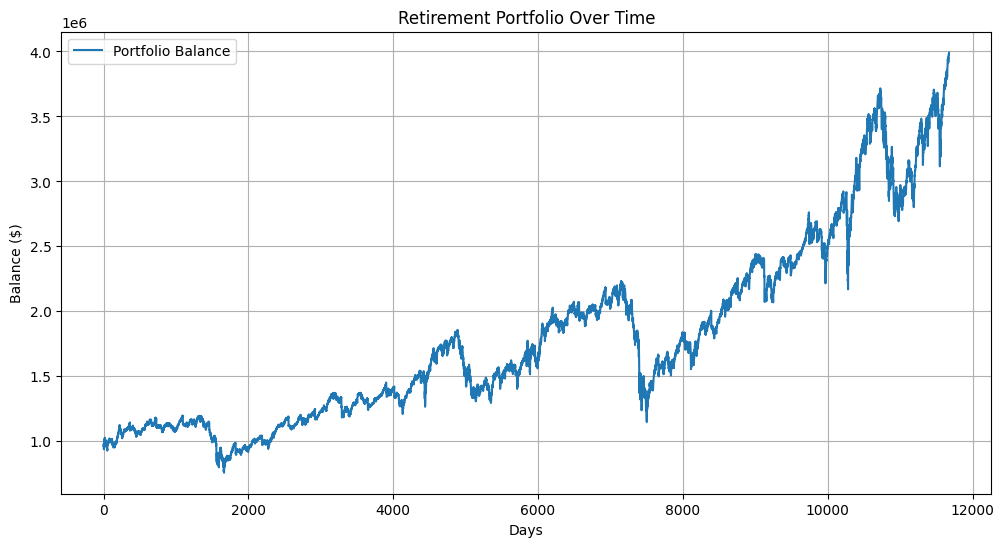

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(history, label="Portfolio Balance")
plt.title("Retirement Portfolio Over Time")
plt.xlabel("Days")
plt.ylabel("Balance ($)")
plt.legend()
plt.grid(True)
plt.show()

Print Annual Withdrawals

In [9]:
print("Annual withdrawals by year:")
for year, amount in enumerate(withdrawals[::365], start=1):
    print(f"Year {year}: ${amount:,.2f}")

Annual withdrawals by year:
Year 1: $51,197.24
Year 2: $57,418.36
Year 3: $59,033.06
Year 4: $59,946.88
Year 5: $57,814.26
Year 6: $48,193.80
Year 7: $51,811.69
Year 8: $59,319.51
Year 9: $62,452.27
Year 10: $67,007.38
Year 11: $66,301.40
Year 12: $71,251.78
Year 13: $77,039.63
Year 14: $88,110.59
Year 15: $71,206.18
Year 16: $75,471.09


In [10]:
print(len(returns))

5838


In [11]:
print(market.tail())

             SP500  BONDS
date                     
2025-10-02  669.22  89.55
2025-10-03  669.21  89.38
2025-10-06  671.61  88.67
2025-10-07  669.12  89.18
2025-10-08  673.11  89.25


In [12]:
market = pd.read_csv("data/market.csv", parse_dates=["date"])
market.set_index("date", inplace=True)
market.sort_index(inplace=True)


In [13]:
print("Start:", market.index.min())
print("End:", market.index.max())
print("Total rows:", len(market))

Start: 2002-07-26 00:00:00
End: 2025-10-08 00:00:00
Total rows: 5839
